In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score 

In [2]:
injuryData = pd.read_csv("../Injuries.csv")
# , index_col=[0]

In [3]:
injuryData.rename(columns={'Notes': 'Injury Type'}, inplace=True)
injuryData.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
injuryData.rename(columns={'Relinquished': 'Player'}, inplace=True)

injuryData

,ID,Date,Team,Acquired,Player,Injury Type
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty
...,...,...,...,...,...,...
37662,37662,2023-04-16,Clippers,Marcus Morris,NaN,activated from IL
37663,37663,2023-04-16,Grizzlies,Dillon Brooks,NaN,activated from IL
37664,37664,2023-04-16,Grizzlies,Ja Morant,NaN,activated from IL
37665,37665,2023-04-16,Grizzlies,Jaren Jackson Jr.,NaN,activated from IL


### We want to separate the dataset by year to get a good idea of the total number of injuries that have occured annually

In [4]:
# Setting the objects in the column to a pandas datetime object
injuryData['Date'] = pd.to_datetime(injuryData['Date'])

#Grouping rows by 'decade' column
injuryData['Year'] = (injuryData['Date'].dt.year)

injuryData

,ID,Date,Team,Acquired,Player,Injury Type,Year
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL,1951
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle,1952
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list,1956
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...,1959
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty,1961
...,...,...,...,...,...,...,...
37662,37662,2023-04-16,Clippers,Marcus Morris,NaN,activated from IL,2023
37663,37663,2023-04-16,Grizzlies,Dillon Brooks,NaN,activated from IL,2023
37664,37664,2023-04-16,Grizzlies,Ja Morant,NaN,activated from IL,2023
37665,37665,2023-04-16,Grizzlies,Jaren Jackson Jr.,NaN,activated from IL,2023


### Let's now remove all rows where the players have been acquired back from the IL 


In [5]:
# Removing the Acquired column removes all duplicates 
injuryData.dropna(axis='columns')

,ID,Date,Team,Injury Type,Year
0,0,1951-12-25,Bullets,placed on IL,1951
1,1,1952-12-26,Knicks,placed on IL with torn side muscle,1952
2,2,1956-12-29,Knicks,placed on inactive list,1956
3,3,1959-01-16,Lakers,player refused to play after being denied a ro...,1959
4,4,1961-11-26,Lakers,player reported for military duty,1961
...,...,...,...,...,...
37662,37662,2023-04-16,Clippers,activated from IL,2023
37663,37663,2023-04-16,Grizzlies,activated from IL,2023
37664,37664,2023-04-16,Grizzlies,activated from IL,2023
37665,37665,2023-04-16,Grizzlies,activated from IL,2023


### Now let's calculate the total sum of injuries for each Year

In [6]:
# We only want to include data from the years after 1989 
yearly_injuries = {}
total_injuries = 0

df = pd.DataFrame()
for year, group in injuryData.groupby('Year'):
    if year > 1989: 
        injuries = group.shape[0]
        yearly_injuries[year] = injuries
        total_injuries += injuries
        # print(f"Year: {year} Injuries: {injuries}")
        # print(f"Total Injuries: {total_injuries}")  

df = pd.DataFrame(list(yearly_injuries.items()), columns=['Year', 'Injuries'])

df

,Year,Injuries
0,1990,113
1,1991,114
2,1992,44
3,1993,59
4,1994,206
5,1995,472
6,1996,545
7,1997,557
8,1998,369
9,1999,689


In [7]:
# Using Linear Regression function to fit our model
train_data = df[:16]

X_train = np.array(train_data['Year']).reshape(-1, 1)
y_train = train_data['Injuries']
reg = LinearRegression()

fit_model = reg.fit(X_train, y_train)

In [8]:
fit_model.coef_

array([54.08235294])

In [9]:
fit_model.intercept_

-107570.12499999997

In [10]:
# Added our insample prediction for each day to our training data set

train_data['prediction_insample'] = fit_model.predict(X_train)
train_data.head()



/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_28021/646307848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prediction_insample'] = fit_model.predict(X_train)


,Year,Injuries,prediction_insample
0,1990,113,53.757353
1,1991,114,107.839706
2,1992,44,161.922059
3,1993,59,216.004412
4,1994,206,270.086765


In [11]:
train_data['error'] = train_data.prediction_insample - train_data.Injuries
train_data['sq_error'] = train_data['error']**2
train_data['error']**2
train_data['abs_error'] = np.abs(train_data['error'])

train_data

/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_28021/289205200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['error'] = train_data.prediction_insample - train_data.Injuries
/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_28021/289205200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sq_error'] = train_data['error']**2
/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_28021/289205200.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,Year,Injuries,prediction_insample,error,sq_error,abs_error
0,1990,113,53.757353,-59.242647,3509.691231,59.242647
1,1991,114,107.839706,-6.160294,37.949224,6.160294
2,1992,44,161.922059,117.922059,13905.611957,117.922059
3,1993,59,216.004412,157.004412,24650.385314,157.004412
4,1994,206,270.086765,64.086765,4107.113410,64.086765
5,1995,472,324.169118,-147.830882,21853.969777,147.830882
6,1996,545,378.251471,-166.748529,27805.072061,166.748529
7,1997,557,432.333824,-124.666176,15541.655556,124.666176
8,1998,369,486.416176,117.416176,13786.558497,117.416176
9,1999,689,540.498529,-148.501471,22052.686767,148.501471


In [12]:
# Returns the mean for error, squared error and absolute error for the training set

train_data[['error', 'sq_error', 'abs_error']].mean()

error        7.275958e-12
sq_error     2.013697e+04
abs_error    1.196868e+02
dtype: float64

Text(0.5, 1.0, 'Number of Injuries Year by Year')

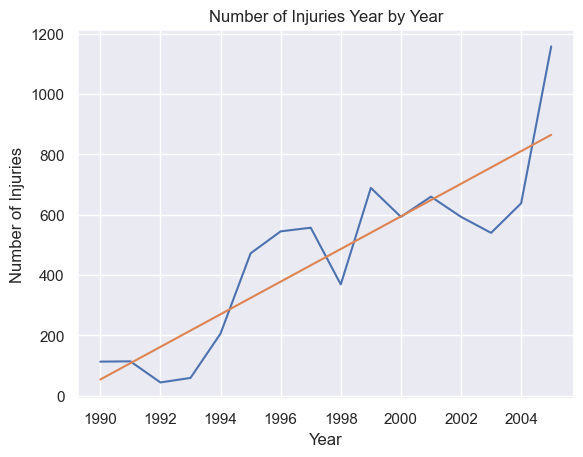

In [14]:
sns.set(style="darkgrid")
sns.lineplot(x=train_data['Year'], y=train_data['Injuries'], data=train_data)
sns.lineplot(x=train_data['Year'], y=train_data['prediction_insample'], data=train_data)
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.title('Number of Injuries Year by Year')

In [26]:
# Now let's remove all the rows from the data frame that have data before 1990
injuryData = injuryData[injuryData['Year'] <= 2000]

injuryData

,ID,Date,Team,Acquired,Player,Injury Type,Year
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL,1951
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle,1952
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list,1956
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...,1959
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty,1961
...,...,...,...,...,...,...,...
4484,4484,2000-12-30,Grizzlies,NaN,Grant Long,placed on IR with fractured right thumb,2000
4485,4485,2000-12-30,Grizzlies,Mahmoud Abdul-Rauf / Chris Jackson,NaN,activated from IL,2000
4486,4486,2000-12-30,Suns,NaN,Ruben Garces,placed on IR with bulging disc,2000
4487,4487,2000-12-30,Suns,Iakovos Tsakalidis / Jake Tsakalidis,NaN,activated from IL,2000


## It is important to note that the NBA did not have and IR/IL until the 1989-1990 season. Prior to this injured players were still members of the active roster. For this reason, it's likely many injuries do not appear in the dataset.

In [23]:
df['yearly_injuries']

1990     113
1991     114
1992      44
1993      59
1994     206
1995     472
1996     545
1997     557
1998     369
1999     689
2000     593
2001     660
2002     593
2003     540
2004     638
2005    1158
2006    1746
2007    1815
2008    1617
2009    1413
2010    1639
2011    1112
2012    1447
2013    1210
2014    1274
2015    1550
2016    1612
2017    2205
2018    1976
2019    1633
2020    1066
2021    2905
2022    2384
2023     985
Name: yearly_injuries, dtype: int64

In [8]:
# Creating our test data set

train_data = injuryData[:8078]
train_data

,ID,Date,Team,Acquired,Player,Injury Type,Year
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL,1951
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle,1952
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list,1956
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...,1959
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty,1961
...,...,...,...,...,...,...,...
8073,8073,2005-12-31,Sonics,Johan Petro,NaN,activated from IL,2005
8074,8074,2005-12-31,Spurs,NaN,Nick Van Exel,placed on IL,2005
8075,8075,2005-12-31,Spurs,Sean Marks,NaN,activated from IL,2005
8076,8076,2005-12-31,Warriors,NaN,Adonal Foyle,placed on IL with back spasms,2005


### We have to encode the data for the "Team" column

In [32]:
# Encoding each unique team instance
# decoding the column for later use and creating a dictionary linking teams to encoded values
unique_values = injuryData['Team'].nunique()
print("Number of unique teams:", unique_values)

Number of unique teams: 33


### We now have a more accurate dataset representing the total number of injuries from 1990-Present. 

### Let's get the average number of injuries per season over this time span

In [33]:
# Occassionally the Dataframe will not properly remove all irrelevent rows
injury_numbers_list = list(yearly_injuries.values())
avg_inj_per_year = np.mean(injury_numbers_list, axis=0)
print(avg_inj_per_year.dtype)
print(np.sum(injury_numbers_list, axis=0))

float64
36939


## I'd now like to encode each individual player name, as well as remove the date column

In [34]:
del injuryData['Date']
label_encoder = LabelEncoder()
injuryData['Player']=label_encoder.fit_transform(injuryData['Player'])

/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_24609/3227852608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuryData['Player']=label_encoder.fit_transform(injuryData['Player'])


In [35]:
injuryData[]

,ID,Team,Acquired,Player,Injury Type,Year
728,728,Cavaliers,NaN,2392,placed on IL with sprained left knee,1990
729,729,Cavaliers,John Morton,2453,activated from IL,1990
730,730,Magic,NaN,1139,placed on IL,1990
731,731,Magic,Morlon Wiley,2453,activated from IL,1990
732,732,Hawks,NaN,423,placed on IL,1990
...,...,...,...,...,...,...
37662,37662,Clippers,Marcus Morris,2453,activated from IL,2023
37663,37663,Grizzlies,Dillon Brooks,2453,activated from IL,2023
37664,37664,Grizzlies,Ja Morant,2453,activated from IL,2023
37665,37665,Grizzlies,Jaren Jackson Jr.,2453,activated from IL,2023


+ Due to a there being a lack of true concensus for the number of players in the NBA from 1990-present, I have estimated the total number of players in this time frame based on the number of teams in the league and the number of roster spots each team was allowed 

+ This does not account for players on two way contracts or players signed midseason, so the number is not 100% accurate, simply an estimation

In [36]:
# Total Number of players in the NBA in total(duplicates allowed) & total number of players per year
total_player_instances = 13446
ppy = total_player_instances/33

ppy

407.45454545454544

## Now I'd like to encode my Injury Type section. However, there are some extra words I'd like to remove first

In [42]:
slices_to_remove = ["placed on IL with", "placed on IR with", "placed on disabled list with", "placed on IL for",
                   "placed on IL recovering from", "placed on IL during", "(date approximate)", "(out for season)", "(DTD)", "(out 6-8 weeks)"]

notes_list = list(injuryData["Injury Type"])

# Perform the replacement operation on the list
for i in range(len(notes_list)):
    for slice_to_remove in slices_to_remove:
        notes_list[i] = notes_list[i].replace(slice_to_remove, "")

# Convert the list back to a NumPy array
injuryData["Injury Type"] = np.array(notes_list)

injuryData

AttributeError: 'int' object has no attribute 'replace'

In [38]:
injuryData['Injury Type']=label_encoder.fit_transform(injuryData['Injury Type'])

/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_24609/2708587343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuryData['Injury Type']=label_encoder.fit_transform(injuryData['Injury Type'])


### Next I decided to create a number of variables to train model on

In [39]:
# Variables for model training
uniq_inj = max(injuryData["Injury Type"]) # max method returns the maximum number, in this case that number is also the total number of unqiue injuries 
uniq_plyr = max(injuryData["Player"])
injury_instances = list(injuryData.shape)[0]
inj_per_plyr = injury_instances/uniq_plyr
inj_per_team = injuryData.groupby('Team')['ID'].count().reset_index()
inj_per_team.columns = ['Team', 'Injury_Count']
inj_list = inj_per_team.to_dict(orient='records')
print(f"Unique Injuries: {uniq_inj}")
print(f"Unique Player Instances: {uniq_plyr}")
print(f"Average number of injuries per player: {inj_per_plyr}")

Unique Injuries: 2645
Unique Player Instances: 2453
Average number of injuries per player: 15.058703628210354


In [40]:
# Convertint the list of key-value pairs into a dictionary of values 
inj_dict = {}
for obj in inj_list: 
    inj_dict[obj['Team']] = obj['Injury_Count']

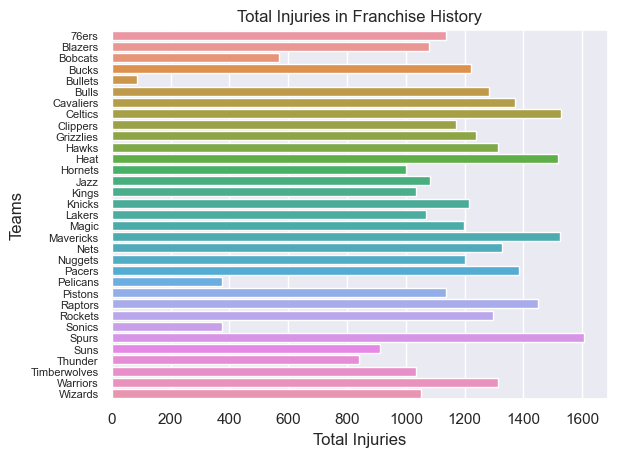

In [41]:
# Bar Graph displaying the total number of injuries per team 

ax = sns.barplot(x=list(inj_dict.values()), y=list(inj_dict.keys()))

# Add labels and title
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8) 
plt.xlabel('Total Injuries')
plt.ylabel('Teams')
plt.title('Total Injuries in Franchise History')

# Display the plot
plt.show()

## Using the Random Forest Algorithm

In [43]:
# Narrowing possible injuries down to the 20 most frequent 
# decoded_labels = label_encoder.inverse_transform(encoded_labels)
injuries = injuryData["Injury Type"]
unique_inj_arr = injuries.value_counts()
sorted_injuries = unique_inj_arr.sort_values(ascending=False)
top_20_injuries = sorted_injuries.head(20)


In [44]:
# Encoding the Team names
injuryData['Team']=label_encoder.fit_transform(injuryData['Team'])

/var/folders/wf/0c6sjv6d37v2hjz6__lc87lw0000gn/T/ipykernel_24609/223668081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuryData['Team']=label_encoder.fit_transform(injuryData['Team'])


In [45]:
# `Current Issue, We DO NOT HAVE A X_VAL, Y_VAL outside of the foreloop below

X = injuryData[['Team', 'Year', 'Player', 'Injury Type']]
y = []

for injury_type in top_20_injuries: 
    y_train_arr = np.where(injuryData['Injury Type'] == injury_type, 1, 0)
    y.append(y_train_arr)
y = np.array(y)

In [46]:
reshaped_y = y.T
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {}
for injury_type, y_train_arr in top_20_injuries:
    model = RandomForestClassifier()
    X_train_injury = injuryData[['Team', 'Year', 'Player', 'Injury Type']]
    model.fit(X_train_injury, y_train_arr)
    models[injury_type] = model

ValueError: Found input variables with inconsistent numbers of samples: [36939, 20]

In [ ]:
len(models)

In [ ]:
# Using the trained models to predict injury types on the validation set
y_probs = {}
for injury_type, model in models.items():
    y_probs[injury_type] = model.predict_proba(X_val)[:, 1]